# Strip Plots - General Covid-19 dataset

In order to create the strip plots, we need the following packages:

In [ ]:
import pandas as pd
import json
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import matplotlib.pyplot as plt 
import nltk
import itertools
import altair as alt
from dateutil.parser import parse
import seaborn as sns
import num2words

plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

alt.data_transformers.disable_max_rows()

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
data1 = data
data2 = data
data3 = data

## Hashtag

Here there are just the top 5 hashtags but the chart can be extended with more hashtags.

In [ ]:
index=0
l = []
date = []
month = []
covid_hashtags = ["covid19","coronavirus","china","stayhome","lockdown"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        token_covid=entity['text'].lower()
        if token_covid in covid_hashtags:
            l.append(token_covid)
            token=data[index]['created_at']
            d = parse(token)
            #d1 = parse(token)
            d = d.strftime('%Y/%m/%d')
            date.append(d)
            #month.append(d1.strftime('%B'))
        
    index=index+1
    
df = pd.DataFrame(
    {'Date': date,
    'Hashtag': l
     #'Month': month
    })
df['Date']= pd.to_datetime(df['Date'])

The strip plot is created:

In [ ]:
#http://alanpryorjr.com/visualizations/seaborn/stripplot/stripplot/

#plt.figure(figsize=(20,15))
#ax = sns.stripplot(x="Date", y="Hashtag", data=df, jitter=0.35, orient='h', marker="D")
#plt.xlabel("Month",fontsize=20)
#plt.ylabel("Hashtag",fontsize=20)

stripplot_hashtag =  alt.Chart(df, width=800, height=120).mark_circle(size=80).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Date'),
    color=alt.Color('Hashtag:N', legend=None,scale=alt.Scale(range=['#332288','#117733','#44AA99','#88CCEE','#DDCC77'])),
    row=alt.Row(
        'Hashtag:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
)

stripplot_hashtag

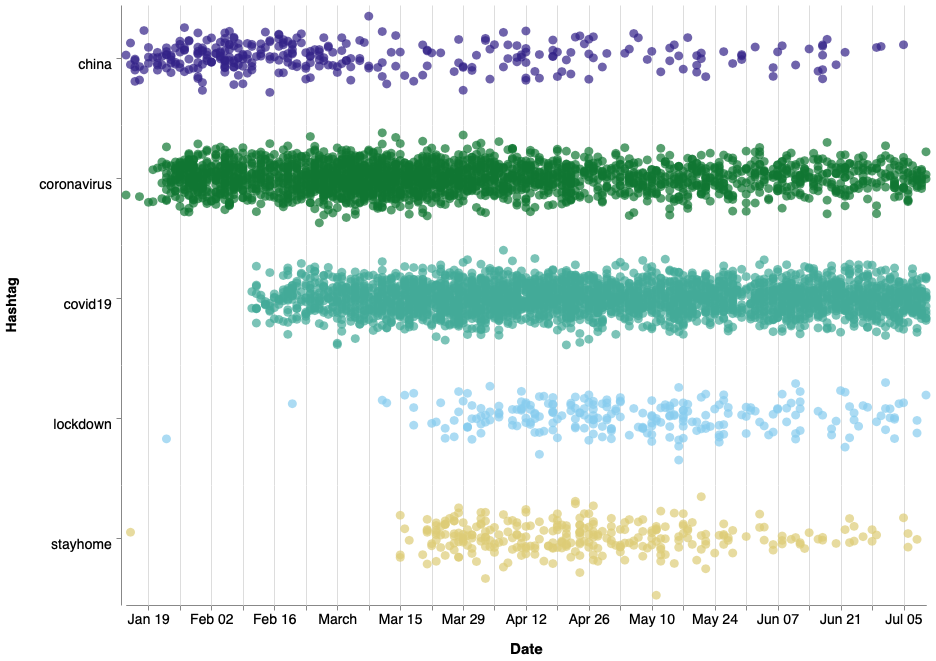

## Mentions

In [ ]:
index_mentions=0
date_mention = []
mentions = []
mentions_list = ["realDonaldTrump","JoeBiden","narendramodi","WHO","CNN"]
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        #print(token_mentions)
        if token_mentions in mentions_list:
            #print("in")
            mentions.append(token_mentions)
            token=data[index_mentions]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            date_mention.append(d)
            
    index_mentions=index_mentions+1
    
    
df_mentions = pd.DataFrame(
    {'Date': date_mention,
    'Mentions': mentions
    })

df_mentions['Date']= pd.to_datetime(df_mentions['Date'])

The strip plot is created:

In [ ]:
#plt.figure(figsize=(20,15))
#ax = sns.stripplot(x="Date", y="Mentions", data=df_mentions, jitter=0.35, orient='h', marker="D")
#plt.xlabel("Month",fontsize=20)
#plt.ylabel("Mentions",fontsize=20)

stripplot_mentions =  alt.Chart(df_mentions, width=800, height=120).mark_circle(size=80).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Date'),
    color=alt.Color('Mentions:N', legend=None, scale=alt.Scale(range=['#4477AA','#66CCEE','#228833','#CCBB44','#EE6677'])),
    row=alt.Row(
        'Mentions:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
)

stripplot_mentions

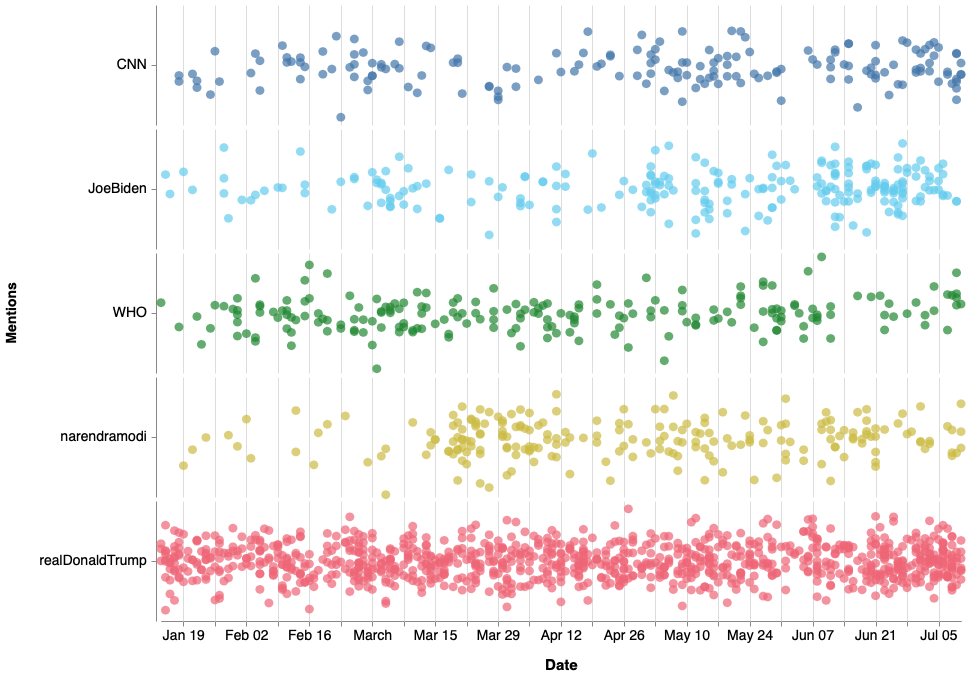

## Emoji

In [ ]:
import demoji
import itertools 

date_emoji = []
index= 0
emos = []
emoji_list = ["😂","😭","🤣","🙏","❤️"]
for element in data:
    em = demoji.findall_list(data[index]['full_text'], False)
    for e in em:
        if e in emoji_list:
            emos.append(e)
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            date_emoji.append(d)
    index= index+1
    
#merged=list(itertools.chain.from_iterable(emos))
    
    
df_em = pd.DataFrame(
    {'Date': date_emoji,
    'Emoji': emos
    })

df_em['Date']= pd.to_datetime(df_em['Date'])

The strip plot is created:

In [ ]:
#plt.figure(figsize=(20,15))
#ax = sns.stripplot(x="Date", y="Emoji", data=df_em, jitter=0.35, orient='h', marker="D")
#plt.xlabel("Month",fontsize=20)
#plt.ylabel("Emoji",fontsize=20)

stripplot_emoji =  alt.Chart(df_em, width=800, height=120).mark_circle(size=80).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Date'),
    color=alt.Color('Emoji:N', legend=None, scale=alt.Scale(range=['#0077BB','#33BBEE','#009988','#EE7733','#CC3311'])),
    row=alt.Row(
        'Emoji:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
)

stripplot_emoji

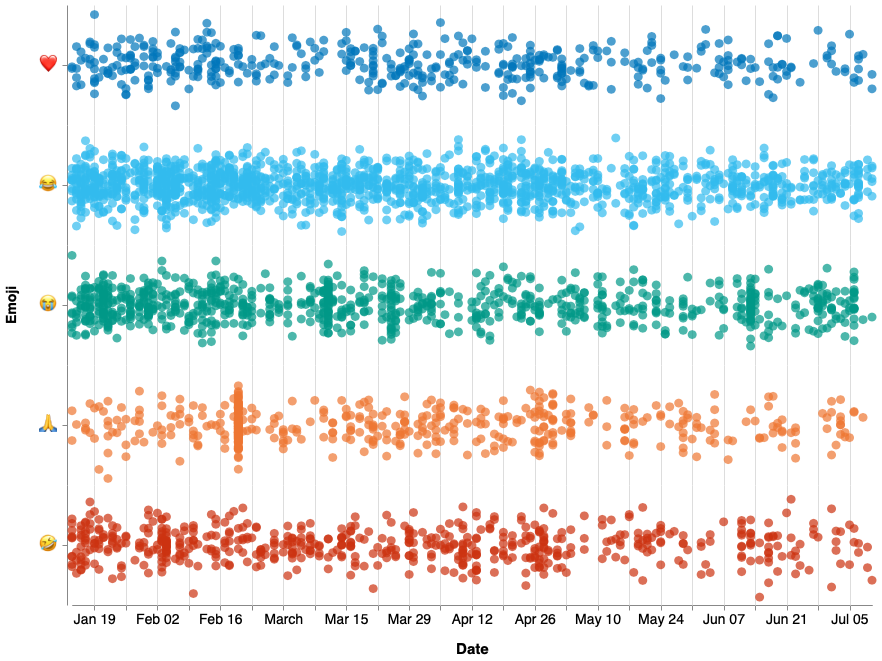

## Text

Not the top 5 words from the bar chart but 5 words that make sense for the purpose of the chart.

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

In [ ]:
word_list = ["cases","coronavirus","lockdown","china","pandemic"]
wlist = []
index=0
dates = []
for element in data1:
    data1[index]['full_text'] = data1[index]['full_text'].lower()                   # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data1[index]['full_text'] = re.sub("\'\w+", '', data1[index]['full_text'])      # Remove everything after '
    data1[index]['full_text'] = remove_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_twitter_urls(data1[index]['full_text'])
    data1[index]['full_text'] = remove_emoticons(data1[index]['full_text'])
    data1[index]['full_text'] = remove_emoji(data1[index]['full_text'])
    data1[index]['full_text'] = give_emoji_free_text(data1[index]['full_text'])
    data1[index]['full_text'] = noamp(data1[index]['full_text'])                    # No amp with space
    data1[index]['full_text'] = re.sub("#\S+", " ",  data1[index]['full_text'])     # Remove hashtags
    data1[index]['full_text'] = re.sub("@\S+", " ",  data1[index]['full_text'])     # No mentions
    data1[index]['full_text'] = data1[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index]['full_text'] = data1[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index]['full_text'] = re.sub("^rt ", " ", data1[index]['full_text'])      # No RT
    data1[index]['full_text'] = re.sub('\s{2,}', " ", data1[index]['full_text'])    # Remove big spaces

    
    tokens=data1[index]['full_text'].split()
    for t in tokens:
        if t in word_list:
            wlist.append(t)
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            dates.append(d)

    index=index+1
    
    
df_text = pd.DataFrame(
    {'Date': dates,
    'Words': wlist
    })

df_text['Date']= pd.to_datetime(df_text['Date'])

The strip plot is created:

In [ ]:
#plt.figure(figsize=(20,15))
#ax = sns.stripplot(x="Date", y="Words", data=df_text, jitter=0.35, orient='h', marker="D")
#plt.xlabel("Month",fontsize=20)
#plt.ylabel("Words",fontsize=20)

stripplot_text =  alt.Chart(df_text, width=800, height=120).mark_circle(size=80).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Date'),
    color=alt.Color('Words:N', legend=None, scale=alt.Scale(range=['#332288','#88CCEE','#44AA99','#117733','#999933'])),
    row=alt.Row(
        'Words:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
)

stripplot_text

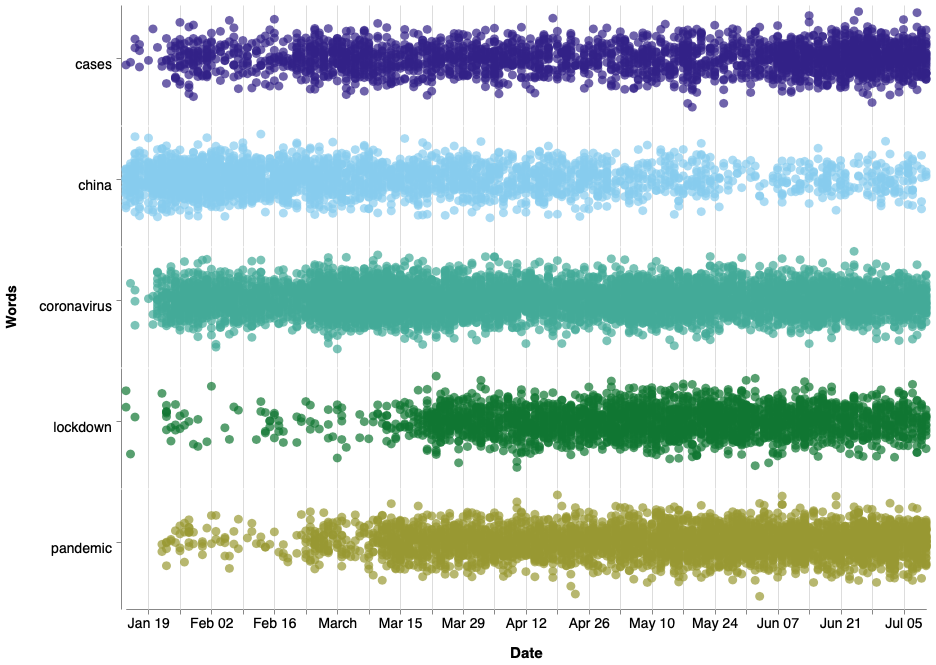

## Bigrams

In [ ]:
from nltk.corpus import stopwords
import contractions

index=0
stop_words = stopwords.words('english')
listab = [("social", "distancing"),("stay", "home"), ("tested", "positive"), ("corona", "virus"), ("coronavirus", "cases")]
new_bigram=[]
datesb = []
for element in data2:
    data2[index]['full_text'] = data2[index]['full_text'].lower()                              # Put everything in lowercase
    data2[index]['full_text'] = contractions.fix(data2[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])                # Remove everything after '
    data2[index]['full_text'] = remove_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_twitter_urls(data2[index]['full_text'])
    data2[index]['full_text'] = remove_emoticons(data2[index]['full_text'])
    data2[index]['full_text'] = remove_emoji(data2[index]['full_text'])
    data2[index]['full_text'] = give_emoji_free_text(data2[index]['full_text'])
    data2[index]['full_text'] = noamp(data2[index]['full_text'])                               # No amp with space
    data2[index]['full_text'] = re.sub("#\S+", " ",  data2[index]['full_text'])                # Remove hashtags
    data2[index]['full_text'] = re.sub("@\S+", " ",  data2[index]['full_text'])                # No mentions
    data2[index]['full_text'] = data2[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data2[index]['full_text'] = data2[index]['full_text'].encode('ascii', 'ignore').decode()   # No unicode
    data2[index]['full_text'] = re.sub("^rt ", " ", data2[index]['full_text'])                 # No RT
    data2[index]['full_text'] = re.sub('\s{2,}', " ", data2[index]['full_text'])               # Remove big spaces
    bigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data2[index]['full_text'])))
    #print(bigram_tokens)
    clean_bigram_tokens = [gram for gram in bigram_tokens if not any(stop in gram for stop in stop_words)]
    for c in clean_bigram_tokens:
        if c in listab:
            new_bigram.append(c[0]+" "+c[1])
            token=data[index]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            datesb.append(d)
    index=index+1
    
    
df_bi = pd.DataFrame(
    {'Date': datesb,
    'Bigrams': new_bigram
    })

df_bi['Date']= pd.to_datetime(df_bi['Date'])

The strip plot is created:

In [ ]:

splotbig = alt.Chart(df_bi, width=800, height=120).mark_circle(size=80).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Date'),
    color=alt.Color('Bigrams:N', legend=None, scale=alt.Scale(range=['#88CCEE','#DDCC77','#CC6677','#AA4499','#882255'])),
    row=alt.Row(
        'Bigrams:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        )
    )
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
)
splotbig


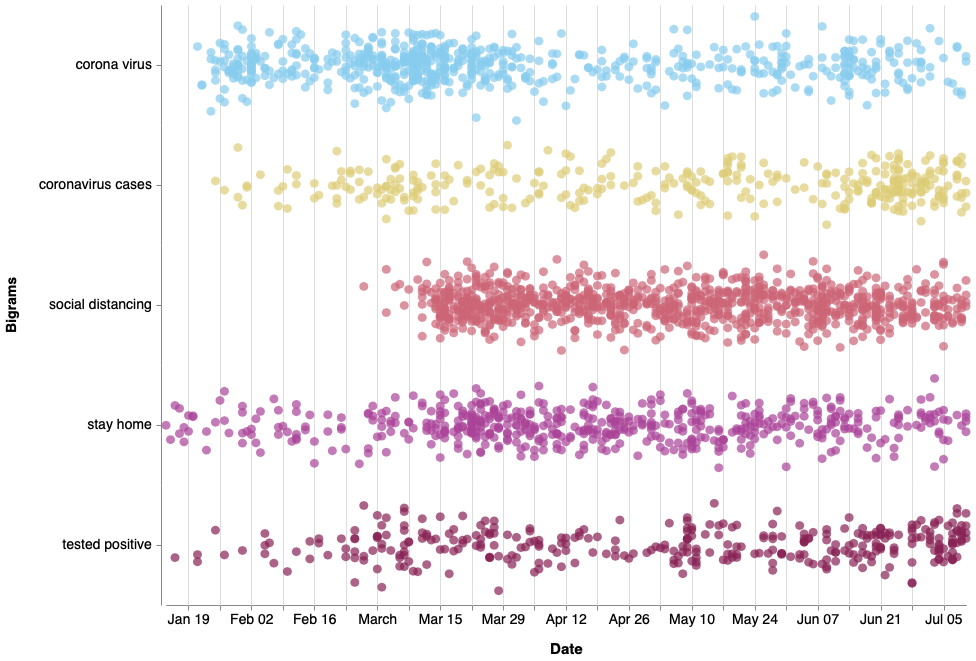

## Trigrams 

In [ ]:
from nltk.corpus import stopwords
import contractions

index_tri=0
stop_words_tri = stopwords.words('english')
listat = [("new", "coronavirus", "cases"),("black", "lives", "matter"), ("let", "us", "see"), ("last", "24", "hours"), ("coronavirus", "death", "toll")]
new_trigram=[]
datest=[]
for element in data3:
    data3[index_tri]['full_text'] = data3[index_tri]['full_text'].lower()                   # Put everything in lowercase
    data3[index_tri]['full_text'] = contractions.fix(data3[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])     # Remove everything after '
    data3[index_tri]['full_text'] = remove_urls(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = remove_twitter_urls(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = remove_emoticons(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = remove_emoji(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = give_emoji_free_text(data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = noamp(data3[index_tri]['full_text'])                    # No amp with space
    data3[index_tri]['full_text'] = re.sub("#\S+", " ",  data3[index_tri]['full_text'])     # Remove hashtags
    data3[index_tri]['full_text'] = re.sub("@\S+", " ",  data3[index_tri]['full_text'])     # No mentions
    data3[index_tri]['full_text'] = data3[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data3[index_tri]['full_text'] = data3[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data3[index_tri]['full_text'] = re.sub("^rt ", " ", data3[index_tri]['full_text'])      # No RT
    data3[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data3[index_tri]['full_text'])
    data3[index_tri]['full_text'] = re.sub('\s{2,}', " ", data3[index_tri]['full_text'])    # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data3[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        if c in listat:
            new_trigram.append(c[0]+" "+c[1]+" "+c[2])
            token=data[index_tri]['created_at']
            d = parse(token)
            d = d.strftime('%Y/%m/%d')
            datest.append(d)
            
    index_tri=index_tri+1

df_tri = pd.DataFrame(
    {'Date': datest,
    'Trigrams': new_trigram
    })

df_tri['Date']= pd.to_datetime(df_tri['Date'])

The strip plot is created:

In [ ]:
#plt.figure(figsize=(20,15))
#ax = sns.stripplot(x="Date", y="Trigrams", data=df_tri, jitter=0.35, orient='h', marker="D")
#plt.xlabel("Month",fontsize=20)
#plt.ylabel("Trigrams",fontsize=20)

stripplot_tri =  alt.Chart(df_tri, width=800, height=120).mark_circle(size=80).encode(
    y=alt.Y(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    x=alt.X('Date'),
    color=alt.Color('Trigrams:N', legend=None, scale=alt.Scale(range=['#0077BB','#33BBEE','#009988','#EE7733','#CC3311'])),
    row=alt.Row(
        'Trigrams:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='left',
            labelOrient='left',
            labelAlign='left',
            labelPadding=3,
            labelFontSize=14,
            titleFontSize=14
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
    titlePadding=15
)

stripplot_tri

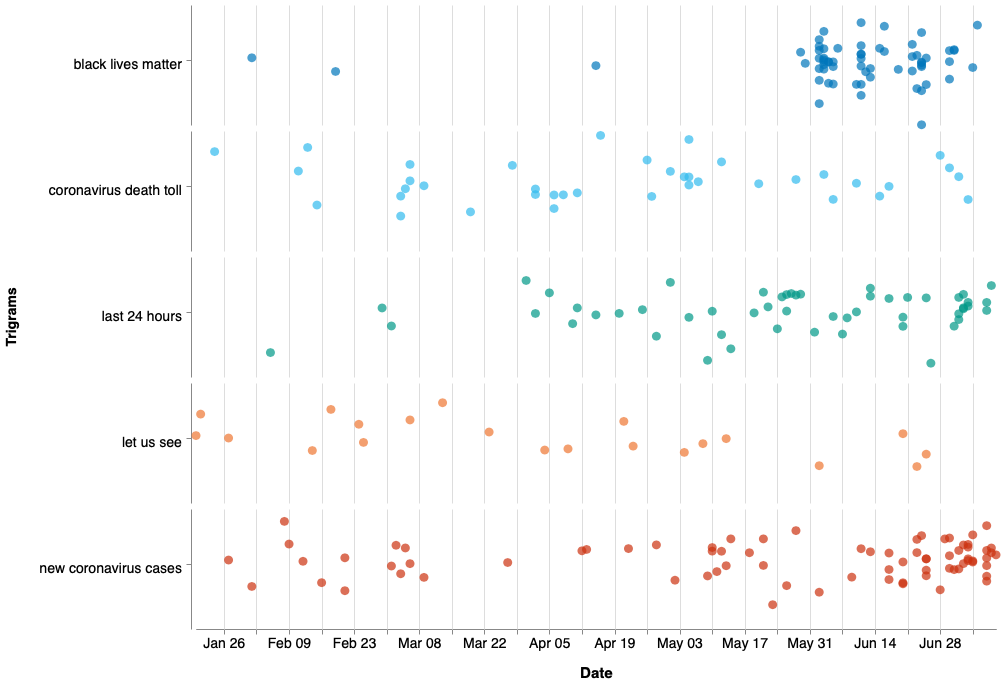